**Joshua A. Rancap**

**BSCS-3A**

# **Midterm Exam: Time Series Analysis and Forecasting with ARIMA Model**

# **Import Libraries**

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

# **1. Data Cleaning and Preparation**

In [85]:
df = pd.read_csv('googleplaystore.csv')
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

def convert_size(x):
    if 'M' in x:
        return float(x[:-1]) * 1000000
    elif 'k' in x:
        return float(x[:-1]) * 1000
    else:
        return 0

df['Size'] = df['Size'].apply(convert_size)
df['Installs'] = df['Installs'].apply(lambda x: int(x[:-1].replace(',', '')))
df['Price'] = df['Price'].apply(lambda x: float(x[1:]) if '$' in x else 0)
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# **2. Exploratory Data Analysis (EDA)**

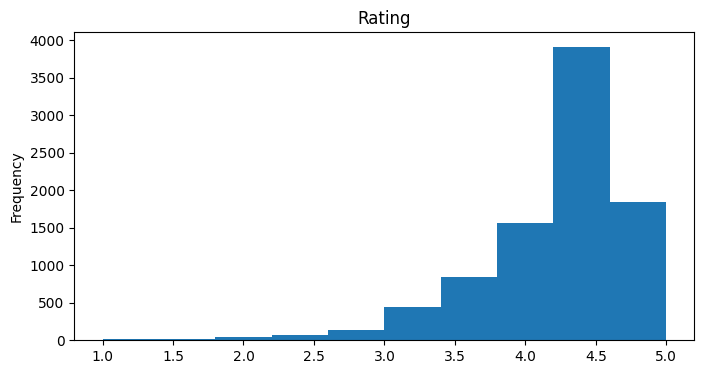

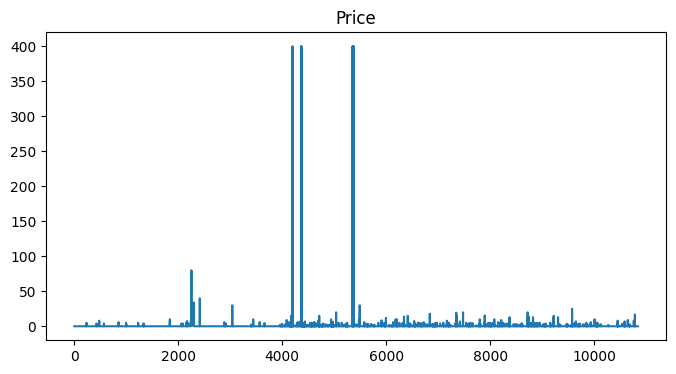

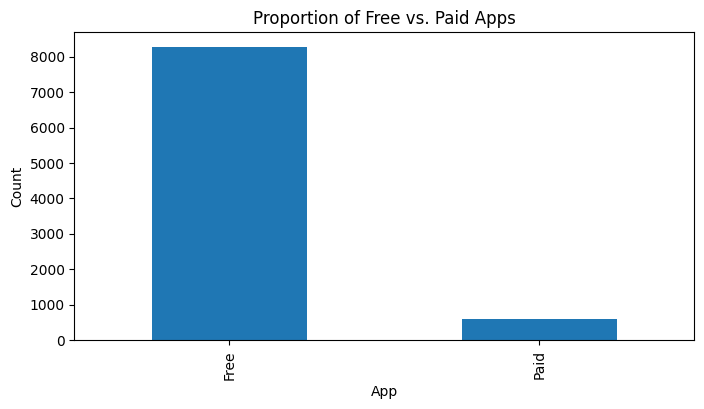

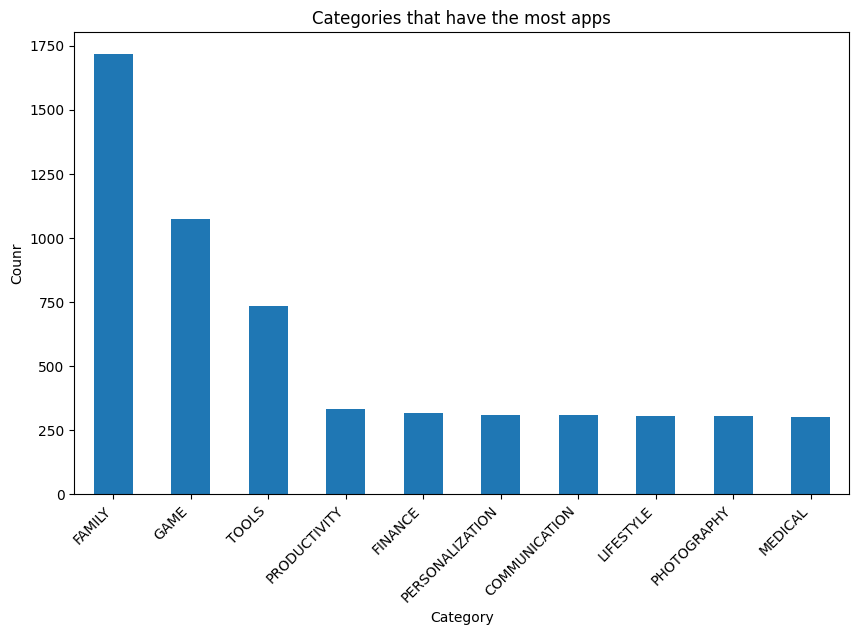

In [86]:
df.describe()

plt.figure(figsize=(8, 4))
df['Rating'].plot(kind='hist')
plt.title('Rating')
plt.show()

plt.figure(figsize=(8, 4))
df['Price'].plot(kind='line')
plt.title('Price')
plt.show()

plt.figure(figsize=(8, 4))
df['Type'].value_counts().plot(kind='bar')
plt.xlabel('App')
plt.ylabel('Count')
plt.title('Proportion of Free vs. Paid Apps')
plt.show()

category_counts = df['Category'].value_counts()
plt.figure(figsize=(10, 6))
category_counts.head(10).plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Counr')
plt.title('Categories that have the most apps')
plt.xticks(rotation=45, ha='right')
plt.show()

# **3. Category Analysis**

Category that has the highest average rating:  EVENTS
Category that has the highest reviews:  GAME
Category that has the most apps:  FAMILY


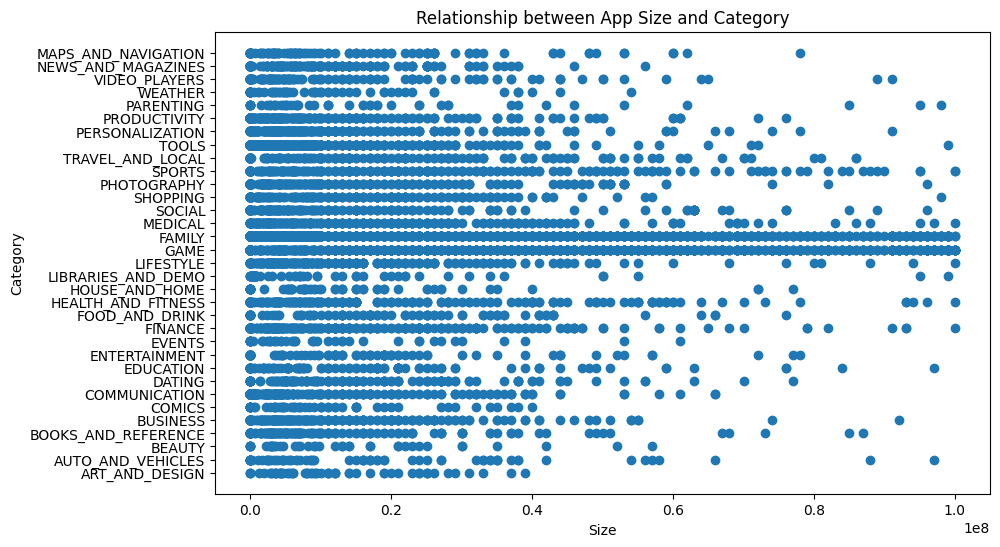

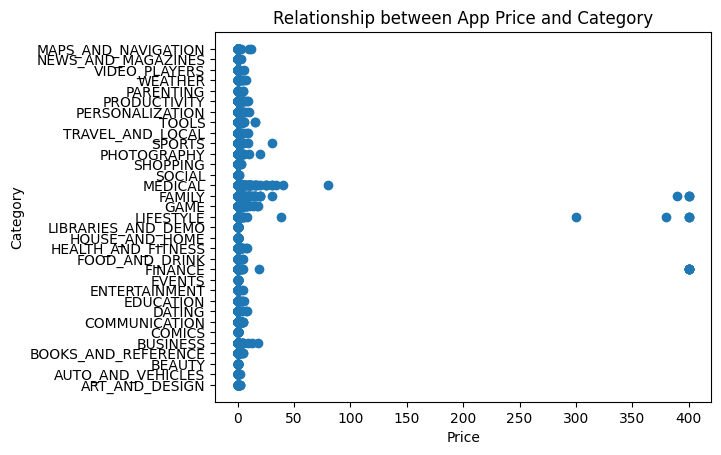

In [87]:
avg = df.groupby('Category')['Rating'].mean()
print("Category that has the highest average rating: ", avg.idxmax())
most_reviews = df.groupby('Category')['Reviews'].sum()
print("Category that has the highest reviews: ", most_reviews.idxmax())
most_apps = df['Category'].value_counts()
print("Category that has the most apps: ", most_apps.idxmax())

plt.figure(figsize=(10, 6))
plt.scatter(df['Size'], df['Category'])
plt.xlabel('Size')
plt.ylabel('Category')
plt.title('Relationship between App Size and Category')
plt.show()

plt.scatter(df['Price'], df['Category'])
plt.xlabel('Price')
plt.ylabel('Category')
plt.title('Relationship between App Price and Category')
plt.show()

# **4. Rating Prediction Model**

In [88]:
#Feature Selection:
df_type_dummies = pd.get_dummies(df['Type'], drop_first=True)
df_dummies = pd.concat([df.drop(columns=['Type']), df_type_dummies], axis=1)

X = df_dummies[['Reviews', 'Size', 'Installs', 'Price', 'Paid']]
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)


MSE:  0.27186723137839425


# **5. Trend Analysis**

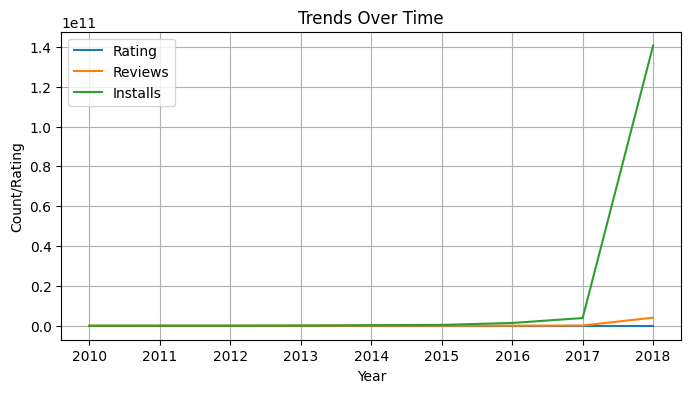

In [89]:
df['Year'] = pd.to_datetime(df['Last Updated']).dt.year
yearly_trends = df.groupby('Year').agg({'Rating': 'mean', 'Reviews': 'sum', 'Installs': 'sum'}).reset_index()

plt.figure(figsize=(8, 4))
for column in ['Rating', 'Reviews', 'Installs']:
    plt.plot(yearly_trends['Year'], yearly_trends[column], label=column.replace('Total ', ''))
plt.xlabel('Year')
plt.ylabel('Count/Rating')
plt.title('Trends Over Time')
plt.legend()
plt.grid(True)
plt.show()

# **6. Impact of Reviews on Ratings**

Correlation: 0.06872388127364139


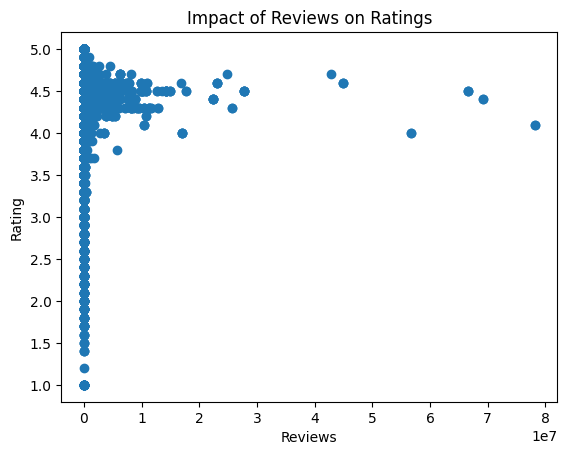

In [90]:
corr = df['Reviews'].corr(df['Rating'])
print("Correlation:", corr)

plt.scatter(df['Reviews'], df['Rating'])
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.title('Impact of Reviews on Ratings')
plt.show()
